# Data Analytics with Python and the Modern NBA 

In [158]:
#Importing packages
import math as m
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Where to get the data we will use in this on going analysis of the modern NBA


> We can get our data at a few different locations online and many people have their own prefrences as far as which source is best. But from my expereince I have found that using basketball-reference.com's data to be the best for web scraping, putting into csv format for use with various programs to run statistical analysis, and data visualizations.
>
> The basketball-reference website has a lot of juicy statistics readily available for use, but I enjoy the detailed explanations given on the webiste for each statistic because this helps me further validate my own findings and aid me in navigating all the stats. 
>
> Now that we know where to get the data we need to scrape it from the web and put it into whatever data format you'd like to have to work with. In my case I have decided to use comma seperated values to use and upload my data into Excel to do some basic cleaning or straight into python pandas data frame depending on the size of the data set. 
The basketllball-refrence.com set I will use first in my analysis is the advanced player stats found at this link: https://www.basketball-reference.com/leagues/NBA_2020_advanced.html





## Cleaning and Prepping the Data

> As I mentioned we can scrape, clean, and prep the data in a various amount of ways but because I have found the use of google sheets for importing/scraping data into a google sheet file to be an enourmous time-saver we will go ahead and do it that way. 

#Need to include how to import data via IMPORTHTML() function in google sheets. Also maybe talk about the downside of doing it this way (i.e. time complexity on larger data sets, some websites may not work because of javascripts, etc..)


In [159]:
NBA_df = pd.read_csv('2019_2020_NBA_Advanced_Stats_excel.csv')

In [160]:
pd.options.display.max_columns = 27
pd.options.display.max_rows = 999

In [161]:
avg_mp = NBA_df['MP'].mean()
avg_mp

200.24145785876993

In [208]:
# Need to get a smaller sample size of players to run some basic analysis on
# I am going to start by selecting the top 50 players and then eliminate more players
# based on what type of analysis I want to do (for example eliminate all players whose
# MP < league average of MP)
pd.options.mode.chained_assignment = None 
top_200 = NBA_df.loc[0:200, :]
MP_200_up = top_200[top_200['MP'] > avg_mp]
top_200_fillNan = top_200['PER'].fillna(0)
top_200['OWS+DWS'] = top_200.OWS + top_200.DWS

In [266]:
MP_200_up['PER-BPM'] = MP_200_up.PER - MP_200_up.BPM
MP_200_up

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,PER-BPM
0,1,Steven Adams,C,26,OKC,9,238,15.3,0.487,0.000,0.379,13.5,24.3,...,0.8,2.7,12.5,16.2,0.2,0.3,0.5,0.106,-2.1,2.5,0.4,0.1,14.9
1,2,Bam Adebayo,C,22,MIA,12,388,20.8,0.621,0.059,0.725,8.4,27.5,...,2.2,4.6,18.7,18.2,0.9,0.9,1.8,0.224,0.7,6.0,6.6,0.8,14.2
2,3,LaMarcus Aldridge,C,34,SAS,13,419,20.4,0.581,0.113,0.253,5.8,15.4,...,0.9,4.8,10.4,22.9,0.8,0.3,1.1,0.127,0.9,0.2,1.1,0.3,19.3
5,6,Jarrett Allen,C,21,BRK,12,307,17.4,0.647,0.015,0.647,11.0,23.5,...,0.9,4.8,16.3,13.8,0.6,0.3,0.9,0.142,-1.1,1.6,0.5,0.2,16.9
6,7,Al-Farouq Aminu,PF,29,ORL,12,247,10.4,0.459,0.407,0.389,6.8,20.6,...,2.4,2.1,13.7,12.9,0.0,0.5,0.4,0.087,-3.5,2.9,-0.7,0.1,11.1
7,8,Kyle Anderson,SF,26,MEM,12,250,15.8,0.570,0.191,0.368,4.2,19.2,...,1.8,3.5,11.2,14.6,0.4,0.2,0.6,0.114,-0.5,1.8,1.3,0.2,14.5
9,10,Giannis Antetokounmpo,PF,25,MIL,12,395,33.8,0.637,0.223,0.603,7.9,32.9,...,1.9,4.1,16.0,34.8,1.6,1.0,2.7,0.323,8.2,6.0,14.2,1.6,19.6
12,13,OG Anunoby,SF,22,TOR,11,332,16.0,0.669,0.449,0.112,3.9,13.8,...,1.7,3.4,9.7,13.3,0.6,0.5,1.2,0.172,1.7,3.3,5.0,0.6,11.0
13,14,Ryan Arcidiacono,PG,25,CHI,13,207,10.8,0.567,0.561,0.415,2.4,8.7,...,1.6,0.4,9.3,10.6,0.4,0.2,0.5,0.120,-0.3,-0.8,-1.2,0.0,12.0
14,15,Trevor Ariza,SF,34,SAC,10,213,8.2,0.545,0.775,0.125,2.1,18.8,...,2.1,0.0,12.4,9.7,0.1,0.1,0.2,0.054,-0.8,-0.2,-1.1,0.1,9.3


In [267]:
# top_200 = top_200.fillna(0)
top_200["PER"].fillna(0, inplace = True)  

top_200

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,OWS+DWS
0,1,Steven Adams,C,26,OKC,9,238,15.3,0.487,0.000,0.379,13.5,24.3,...,0.8,2.7,12.5,16.2,0.2,0.3,0.5,0.106,-2.1,2.5,0.4,0.1,0.5
1,2,Bam Adebayo,C,22,MIA,12,388,20.8,0.621,0.059,0.725,8.4,27.5,...,2.2,4.6,18.7,18.2,0.9,0.9,1.8,0.224,0.7,6.0,6.6,0.8,1.8
2,3,LaMarcus Aldridge,C,34,SAS,13,419,20.4,0.581,0.113,0.253,5.8,15.4,...,0.9,4.8,10.4,22.9,0.8,0.3,1.1,0.127,0.9,0.2,1.1,0.3,1.1
3,4,Nickeil Alexander-Walker,SG,21,NOP,12,175,7.6,0.437,0.488,0.116,1.2,15.0,...,1.0,1.0,15.8,24.7,-0.2,0.0,-0.2,-0.063,-3.9,-3.0,-7.0,-0.2,-0.2
4,5,Grayson Allen,SG,24,MEM,5,84,6.3,0.459,0.543,0.343,1.3,11.4,...,1.1,0.0,14.8,23.1,-0.1,0.0,-0.1,-0.057,-3.9,-3.8,-7.7,-0.1,-0.1
5,6,Jarrett Allen,C,21,BRK,12,307,17.4,0.647,0.015,0.647,11.0,23.5,...,0.9,4.8,16.3,13.8,0.6,0.3,0.9,0.142,-1.1,1.6,0.5,0.2,0.9
6,7,Al-Farouq Aminu,PF,29,ORL,12,247,10.4,0.459,0.407,0.389,6.8,20.6,...,2.4,2.1,13.7,12.9,0.0,0.5,0.4,0.087,-3.5,2.9,-0.7,0.1,0.5
7,8,Kyle Anderson,SF,26,MEM,12,250,15.8,0.570,0.191,0.368,4.2,19.2,...,1.8,3.5,11.2,14.6,0.4,0.2,0.6,0.114,-0.5,1.8,1.3,0.2,0.6
8,9,Ryan Anderson,PF,31,HOU,2,14,9.9,0.357,0.714,0.000,0.0,50.9,...,3.2,0.0,12.5,23.1,0.0,0.0,0.0,-0.025,-6.5,2.1,-4.5,0.0,0.0
9,10,Giannis Antetokounmpo,PF,25,MIL,12,395,33.8,0.637,0.223,0.603,7.9,32.9,...,1.9,4.1,16.0,34.8,1.6,1.0,2.7,0.323,8.2,6.0,14.2,1.6,2.6


The PER column from the top 200 players in the data set has a few players with a NaN value which is going to cause problems in calculations and analysis ahead, so in order to deal with that for now I have replaced the NaN value with a 0, I will need to revisit this and determine if this was a bad mistake. But for now it seems logical because it is neither positive nor negative thus is a good reason to use 0 to not swing the players values too much in one direction. Also PER, OWS, and, DWS can be either positive and negative in value.

In [210]:
x1 = top_200['OWS']
x2 = top_200['DWS']
y = top_200_fillNan

x1 = [x1[i] for i in range(len(x1))]
x2 = [x2[i] for i in range(len(x2))]
y = [y[i] for i in range(len(y)) if np.isnan(y[i]) != True]
y

x1_x2 = list(zip(x1,x2))

X  = []
for i in x1_x2:
    X.append(i[0]+i[1])
    
x_y = list(zip(X,y))

x_y

[(0.5, 15.3),
 (1.8, 20.8),
 (1.1, 20.4),
 (-0.2, 7.6),
 (-0.1, 6.3),
 (0.8999999999999999, 17.4),
 (0.5, 10.4),
 (0.6000000000000001, 15.8),
 (0.0, 9.9),
 (2.6, 33.8),
 (0.0, 3.9),
 (0.0, 18.8),
 (1.1, 16.0),
 (0.6000000000000001, 10.8),
 (0.2, 8.2),
 (0.7, 13.7),
 (0.2, 26.4),
 (-0.5, 5.2),
 (0.0, 14.5),
 (0.30000000000000004, 14.7),
 (0.0, 7.5),
 (0.1, 25.0),
 (1.0, 16.4),
 (-0.2, 11.6),
 (1.0, 17.9),
 (0.0, 10.7),
 (0.0, 7.6),
 (1.5, 23.0),
 (0.0, 8.5),
 (0.2, 8.6),
 (1.0, 23.3),
 (0.0, 7.1),
 (-0.4, 2.2),
 (-0.1, 11.1),
 (0.2, 11.7),
 (0.5, 12.5),
 (0.2, 7.7),
 (0.0, 2.7),
 (0.4, 16.2),
 (0.4, 17.2),
 (1.0, 18.5),
 (1.2, 20.2),
 (0.7, 16.4),
 (0.8999999999999999, 16.3),
 (0.0, 8.1),
 (-0.1, -65.2),
 (0.2, 9.2),
 (1.4, 20.6),
 (0.4, 18.3),
 (0.0, 1.8),
 (0.0, 10.3),
 (0.6000000000000001, 10.7),
 (0.4, 17.9),
 (0.0, 21.9),
 (0.0, 4.2),
 (0.4, 10.0),
 (0.1, 10.0),
 (0.0, 41.4),
 (1.5, 22.8),
 (0.5, 13.5),
 (-0.1, 7.4),
 (0.1, 17.9),
 (1.1, 20.8),
 (0.0, -1.1),
 (0.4, 13.0),
 (0.4, 16

Text(0.5, 0, 'OWS + DWS')

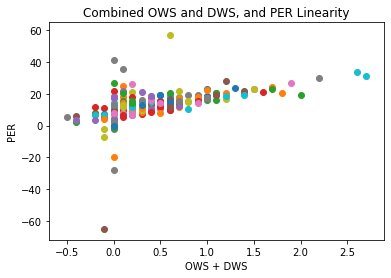

In [211]:
for i in range(0,len(x_y)):
    plt.scatter(x_y[i][0], x_y[i][1])
plt.title("Combined OWS and DWS, and PER Linearity")
plt.ylabel("PER")
plt.xlabel("OWS + DWS")
    

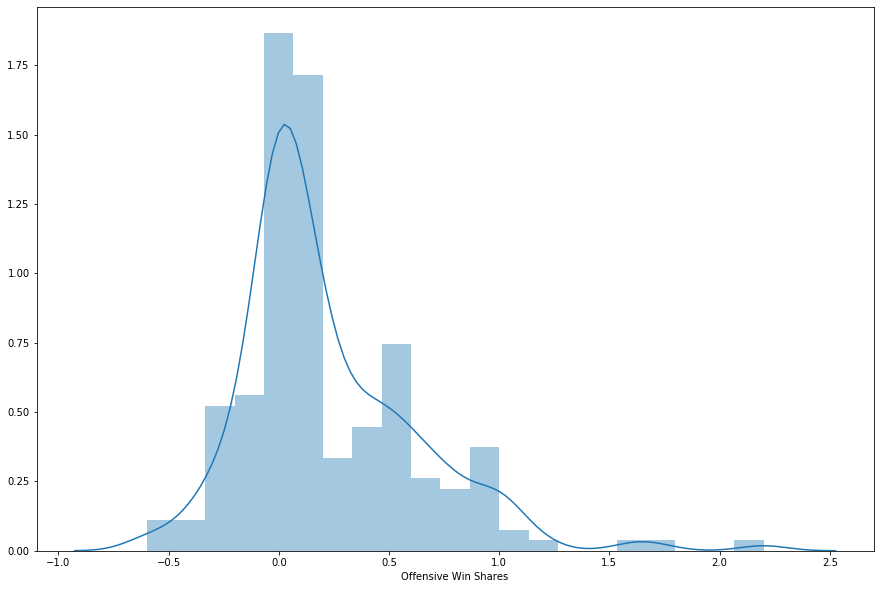

In [212]:
plt.figure(figsize=(15,10))
plt.tight_layout()
plt.xlabel("Offensive Win Shares")
sns.distplot(x1)

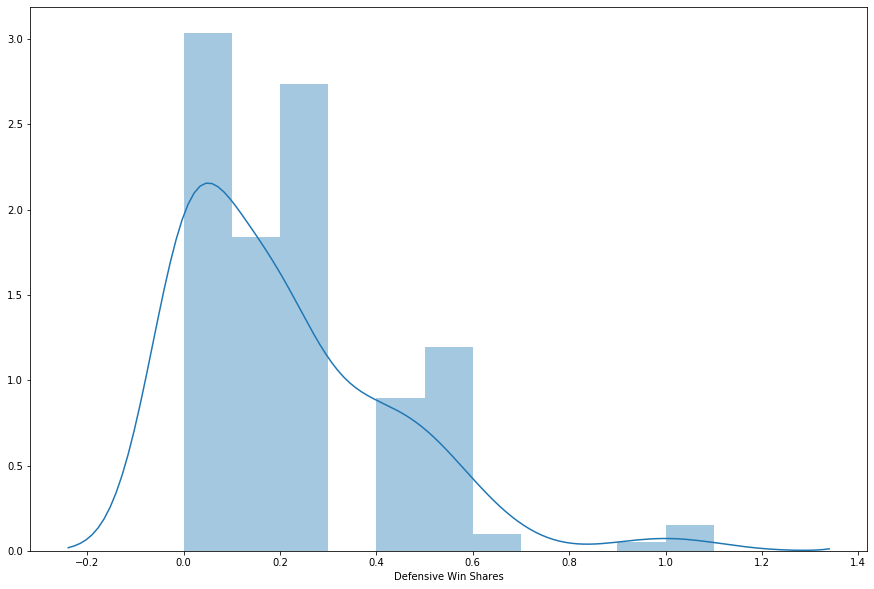

In [213]:
plt.figure(figsize=(15,10))
plt.tight_layout()
plt.xlabel("Defensive Win Shares")
sns.distplot(x2)

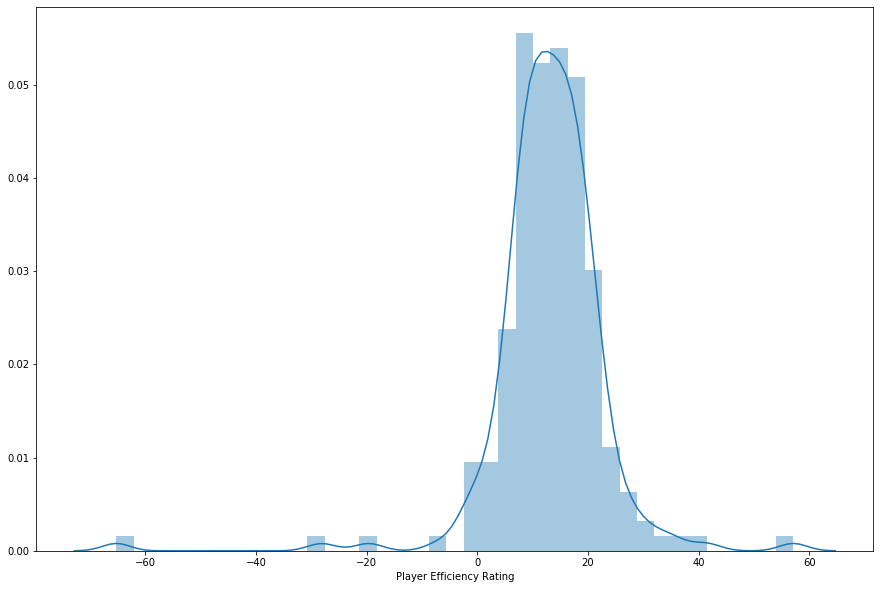

In [214]:
plt.figure(figsize=(15,10))
plt.tight_layout()
plt.xlabel("Player Efficiency Rating")
sns.distplot(y)

In [253]:
# X = top_200[['OWS','DWS', 'WS']]
# y = top_200['PER']
X = MP_200_up[['OWS','DWS', 'WS']]
y = MP_200_up['PER']

In [259]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.9, random_state=0)

In [260]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [261]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
OWS,23.423517
DWS,18.821909
WS,-14.567658


In [262]:
y_pred = regressor.predict(X_test)


In [263]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
165,9.8,9.737826
15,13.7,14.556445
153,15.4,15.407295
2,20.4,18.098788
40,18.5,19.130129
192,14.4,10.588676
200,12.7,11.934423
12,16.0,15.721701
27,23.0,22.637737
168,10.0,13.391189


In [264]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.163632971405218
Mean Squared Error: 7.990071354066985
Root Mean Squared Error: 2.8266714266194763


In [265]:
top_200.loc[top_200['PER'] >57]

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,OWS+DWS
148,149,Paul George,SF,29,LAC,2,44,57.1,0.809,0.471,0.618,4.9,25.2,...,2.1,2.0,15.6,47.6,0.5,0.1,0.5,0.59,22.9,1.9,24.8,0.3,0.6
